In [1]:
import numpy as np
import warnings
from sklearn.cluster import KMeans
import pylab as plt


In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")


In [3]:
#datos generados aleatoriamente con seteed 1234
np.random.seed(1234)
X1 = np.random.normal(loc=5, scale=1, size=(10,1))
X2 = np.random.normal(loc=5, scale=1, size=(10,1))
X3 = np.random.normal(loc=20, scale=1, size=(10,1))
X4 = np.random.normal(loc=20, scale=1, size=(10,1))

Y1 = np.random.normal(loc=5, scale=1, size=(10,1))
Y2 = np.random.normal(loc=20, scale=1, size=(10,1))
Y3 = np.random.normal(loc=5, scale=1, size=(10,1))
Y4 = np.random.normal(loc=20, scale=1, size=(10,1))

XX = np.array(np.concatenate((X1,X2,X3,X4), axis=0))
YY = np.array(np.concatenate((Y1,Y2,Y3,Y4), axis=0))

X = np.array(np.concatenate((XX,YY), axis=1))
X = np.reshape(X, (40,2))
X.shape

(40, 2)

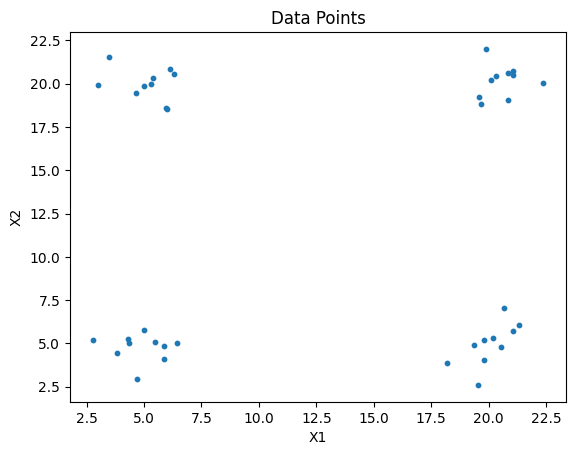

In [4]:
#plot X points
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.show()

# K-means

- utiliza el método del codo para seleccionar el mejor número de clusters
- Utiliza el método de la silueta para obtener el mejor número de clusters

In [5]:

from sklearn.cluster import KMeans

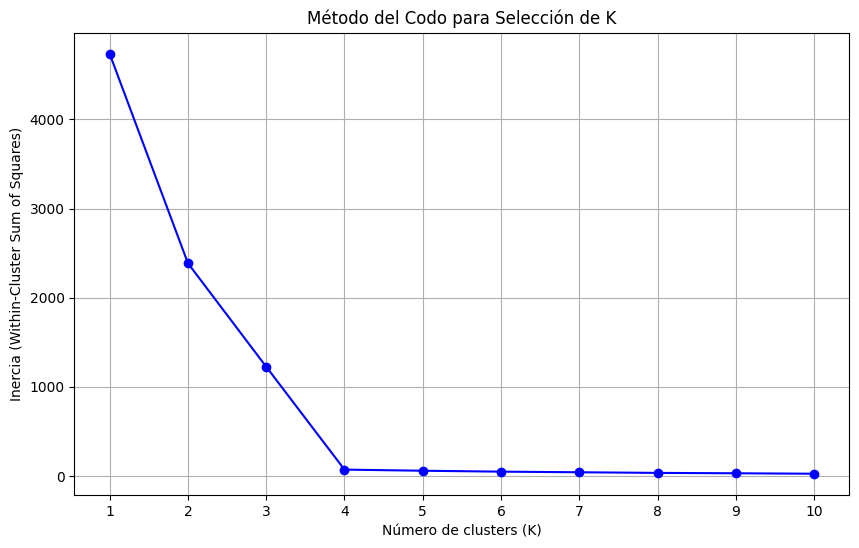

In [9]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

# Graficar método del codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia (Within-Cluster Sum of Squares)')
plt.title('Método del Codo para Selección de K')
plt.xticks(K_range)
plt.grid(True)
plt.show()
    
    


K=2: Silhouette Score = 0.5193
K=3: Silhouette Score = 0.6513
K=4: Silhouette Score = 0.8782
K=5: Silhouette Score = 0.7562
K=6: Silhouette Score = 0.6669
K=7: Silhouette Score = 0.5201
K=8: Silhouette Score = 0.3968
K=9: Silhouette Score = 0.3894
K=10: Silhouette Score = 0.4201


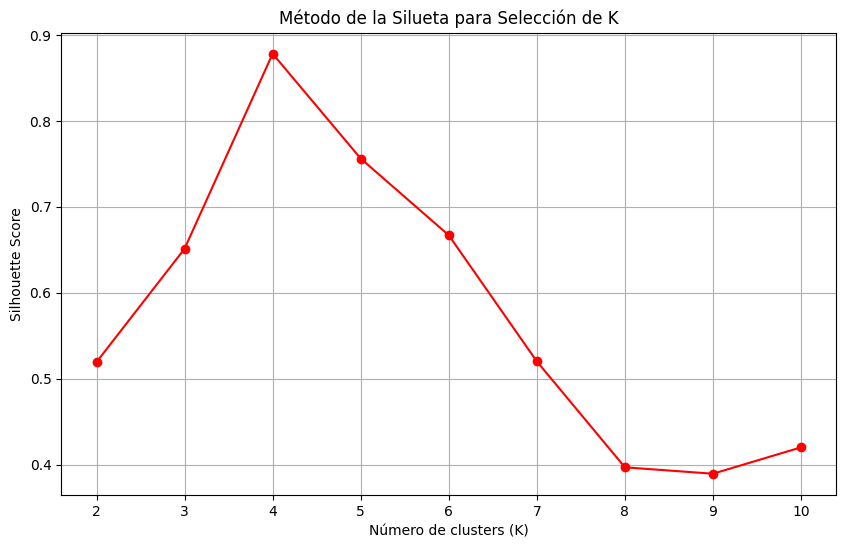

In [10]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_range = range(2, 11)  # mínimo 2 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'K={k}: Silhouette Score = {score:.4f}')

# Graficar silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Método de la Silueta para Selección de K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Hierarchical

Con los mismos datos del apartado anterior:
- aplicar hierarchical clustering con linkage "complete" y distancia euclidian
- aplicar hierarchical clustering con linkage "complete" y distancia Manhattan ('cityblock')
- aplicar hierarchical clustering con linkage "single" y distancia euclidian

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical (II)

Con los nuevos datos generados, se pide:
- Generar hierarchical cluster con distancia euclidia y método "copmlete"
- Generar hierarchical cluster con distancia euclidia y método "single"

Para los 2 casos, se pide seleccionar con el método de la silueta el mejor cluster y dibujar los puntos con los labels de los clusters creados.

¿Cuál de los dos métodos funciona mejor?

In [5]:
np.random.seed(1234)
X1 = np.random.normal(loc=12.5, scale=3, size=(40,1))
Y1 = X1*1 + np.random.normal(loc=0, scale=1, size=(40,1))

X2 = np.random.normal(loc=5, scale=1, size=(10,1))
Y2 = np.random.normal(loc=20, scale=1, size=(10,1))

X3 = np.random.normal(loc=20, scale=1, size=(10,1))
Y3 = np.random.normal(loc=5, scale=1, size=(10,1))

#X4 = np.random.normal(loc=20, scale=1, size=(10,1))
#Y4 = np.random.normal(loc=20, scale=1, size=(10,1))


XX = np.array(np.concatenate((X1,X2,X3), axis=0))
YY = np.array(np.concatenate((Y1,Y2,Y3), axis=0))

X = np.array(np.concatenate((XX,YY), axis=1))
X = np.reshape(X, (60,2))
X.shape

(60, 2)

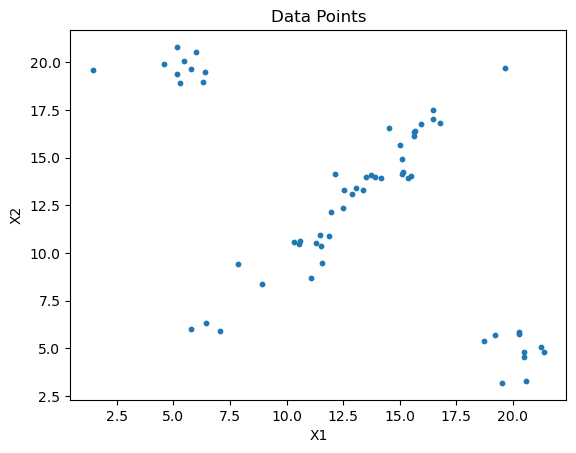

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.show()